In [1]:
import numpy as np
from matplotlib import pyplot as plt
from numpy.core.function_base import linspace

In [2]:
def lr_zerlegung_mit_pivot(A):
    n = A.shape[0]
    p = list(range(n))

    for k in range(n - 1):
        i = np.argmax(np.abs(A[k:, k])) + k

        # Tausche Zeilen k und i
        if i != k:
            p[k], p[i] = p[i], p[k]
            A[[k, i], :] = A[[i, k], :]

        # Gauß-Elimination
        for j in range(k + 1, n):
            if A[k, k] == 0:
                raise ValueError("Matrix ist singulär und kann nicht zerlegt werden.")
            A[j, k] /= A[k, k]
            for h in range(k+1, n):
                A[j,h] -= A[j, k] * A[k, h]

    return p


def lr_loeser_mit_pivot(p, A, b):
    n = A.shape[0]

    b = b[p]

    y = np.zeros_like(b)
    for i in range(n):
        y[i] = b[i] - sum(A[i, j] * y[j] for j in range(i))

    x = np.zeros_like(b)
    for i in range(n - 1, -1, -1):
        x[i] = (y[i] - sum(A[i, j] * x[j] for j in range(i + 1, n))) / A[i, i]

    return x

In [3]:
def cond_inf(A: np.array) -> float:
    n = A.shape[0]
    A_copy = A.copy()
    p = lr_zerlegung_mit_pivot(A)

    A_inv = np.zeros_like(A)

    for i in range(0,n):
        b = np.zeros(n)
        b[i] = 1
        A_inv[:, i] = lr_loeser_mit_pivot(p,A,b)

    Anorm = np.linalg.norm(A_copy, np.inf)
    A_inv_norm = np.linalg.norm(A_inv, np.inf)

    return Anorm*A_inv_norm

A = np.array([[1, 5, 6],
              [4, 5, 6],
              [7, 8, 9]], dtype=float)
condA = cond_inf(A)
print("Konditionszahl:" + str(condA))


Konditionszahl:151.99999999999994


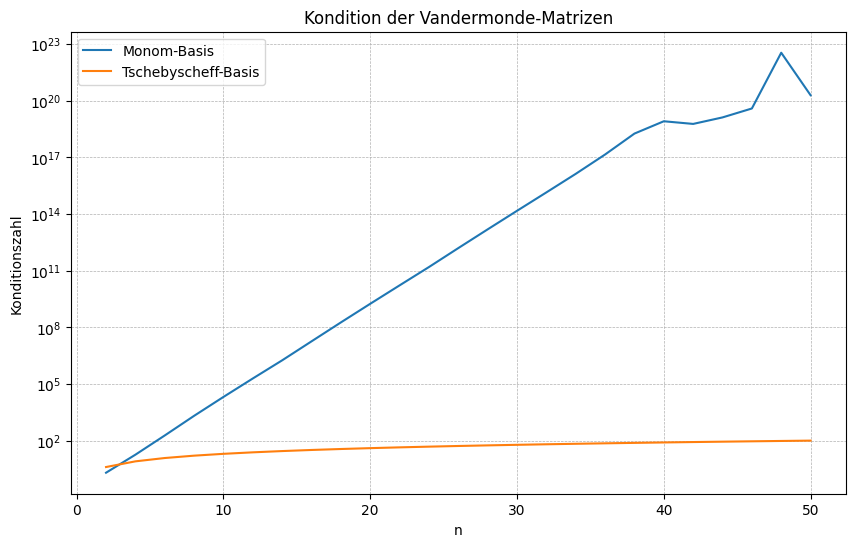

In [4]:
def monom_points(n: int) -> np.ndarray:
    x = np.linspace(-1,1,n)
    return x


def calculate_vandermonde_monom(n: int) -> np.array:
    V = np.zeros([n,n])
    y = monom_points(n)

    for i in range(n):
        for j in range(n):
            V[i][j] = y[i]**j

    return V


def chebysh_points(n: int) -> np.ndarray:
    x = np.ndarray(n)

    for i in range(n):
        x[i] = np.cos(i*(np.pi/n))

    return x


def calculate_vandermonde_chebysh(n: int) -> np.array:
    V = np.zeros([n,n])
    y = chebysh_points(n)

    for i in range(n):
        for j in range(n):
            V[i][j] = np.cos(j*np.arccos(y[i]))

    return V

cond_mon = list()
cond_cheb = list()
nlist = list()

for i in range(2,52,2):
    nlist.append(i)
    V_mon = calculate_vandermonde_monom(i)
    V_cheb = calculate_vandermonde_chebysh(i)

    cond_mon.append(cond_inf(V_mon))
    cond_cheb.append(cond_inf(V_cheb))

plt.figure(figsize=(10, 6))
plt.plot(nlist, cond_mon, label="Monom-Basis")
plt.plot(nlist, cond_cheb, label="Tschebyscheff-Basis")

plt.yscale('log')

plt.xlabel("n")
plt.ylabel("Konditionszahl")
plt.title("Kondition der Vandermonde-Matrizen")
plt.legend()
plt.grid(True, which="both", linestyle="--", linewidth=0.5)

plt.show()
